In [1]:
#!pip install pypandoc-binary
#!pip install nltk
#!pip install sumy
#!pip install pyLDAvis

In [2]:
import os
import pypandoc

folderpath = ".\Files"

# Get a list of all files in the folderpath
entries = os.listdir(folderpath)

# Iterate through each file and convert to plain text
for entry in entries:
    if entry.lower().endswith(".docx"):
        try:
            output_file = entry.lower().replace(".docx", ".txt")
            output_path = os.path.join('./Files_Text', output_file)

            input_file = os.path.join(folderpath, entry.lower())
            pypandoc.convert_file(input_file, 'plain', format='docx', outputfile=output_path)

            print(f"{output_file} is written")
        except Exception as e:
            print(f"Error occurred while converting {entry}: {str(e)}")

files 1-99.txt is written
files 100-199.txt is written
files 200-299.txt is written
files 300-399.txt is written
files 400-499.txt is written
files 500-599.txt is written
files 600-699.txt is written
files 700-799.txt is written
files 800-844.txt is written


In [3]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = './Files_Text'
newcorpus = PlaintextCorpusReader(corpus_root, '.*')

In [4]:
fileids=newcorpus.fileids()
fileids

['files 1-99.txt',
 'files 100-199.txt',
 'files 200-299.txt',
 'files 300-399.txt',
 'files 400-499.txt',
 'files 500-599.txt',
 'files 600-699.txt',
 'files 700-799.txt',
 'files 800-844.txt']

In [5]:
import pandas as pd

colnames=['Document','Body','Title']
df=pd.DataFrame(columns=colnames)

count=1
lst=[0,'','']


for j in range(len(fileids)):
    print(fileids[j]+" is getting read...")
    x=newcorpus.open(fileids[j]).read().split('\r\n\r\n')
         
    startindexes = []
    endindexes = []

    for i, line in enumerate(x):
        if line == 'Body':
            startindexes.append(i)
        if 'Load-Date:' in line:
            endindexes.append(i)

    if len(startindexes) == 0 or len(endindexes) == 0:
        print("No 'BODY' or 'LOAD-DATE:' found in the text file.")
        continue  # Skip processing this file
    
    cnt=1
    titles=[]
    for k,s in enumerate(x):
        if str(cnt)+"." in s:
            titles.append(s)
            cnt+=1
    print("Length of titles in ",fileids[j], "are: ",len(titles)-1)

    for ind in range(len(startindexes)):
        if ind >= len(endindexes):
            print("No corresponding 'LOAD-DATE:' found for 'BODY' index:", ind)
            continue  # Skip this iteration

        lst[0] = count
        lst[1] = ''.join(x[startindexes[ind] + 2 : endindexes[ind]])
        lst[2] = titles[ind].strip()
        df.loc[len(df.index)] = lst
        count += 1

    
df.shape

files 1-99.txt is getting read...
Length of titles in  files 1-99.txt are:  99
files 100-199.txt is getting read...
Length of titles in  files 100-199.txt are:  100
files 200-299.txt is getting read...
Length of titles in  files 200-299.txt are:  100
files 300-399.txt is getting read...
Length of titles in  files 300-399.txt are:  102
files 400-499.txt is getting read...
Length of titles in  files 400-499.txt are:  100
files 500-599.txt is getting read...
Length of titles in  files 500-599.txt are:  100
files 600-699.txt is getting read...
Length of titles in  files 600-699.txt are:  100
files 700-799.txt is getting read...
Length of titles in  files 700-799.txt are:  100
files 800-844.txt is getting read...
Length of titles in  files 800-844.txt are:  45


(844, 3)

In [6]:
df

,Document,Body,Title
0,1,Between juggling multiple dream projects and m...,1. How to start up after failure?
1,2,India has the third-largest start-up environme...,2. Entrepreneur Pavan Reddy Appakonda tells us...
2,3,"For the weekend, we have these four amazing pa...",3. From the story of a kingmaker to farmland f...
3,4,Success of a start-up is never certain. As a m...,4. Biggest startup failures till date you can ...
4,5,Any NGO registered as a private limited compan...,5. 'Startups in India bringing down unemployme...
...,...,...,...
839,840,,41. SoftBank -backed Oyo to reduce planned IPO...
840,841,,42. SoftBank -backed Oyo to reduce planned IPO...
841,842,,43. Oyo to reduce planned IPO amid tech headwinds
842,843,,44. ஸ்டார்ட்அப் நிறுவனங்களுக்கு கோகுல் ராஜாராம...


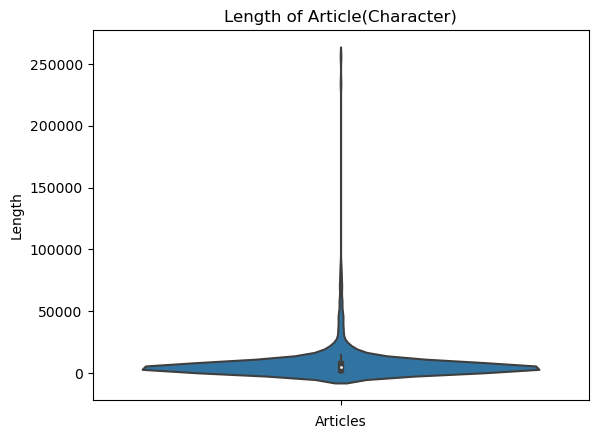

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate article lengths using apply()
df['Article Length'] = df['Body'].apply(len)

# Create a violin plot using Seaborn
sns.violinplot(y=df['Article Length'])

# Set plot title and labels
plt.title('Length of Article(Character)')
plt.xlabel('Articles')
plt.ylabel('Length')

# Display the plot
plt.show()

In [8]:
import numpy as np

# Calculate the length of the body text for each article
df['Body_length'] = df['Body'].str.len()

# Convert the body length values to numeric
df['Body_length'] = pd.to_numeric(df['Body_length'], errors='coerce')

# Assuming your DataFrame has a column named 'body' containing the numerical variable
Q1 = df['Body_length'].quantile(0.25)
Q3 = df['Body_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame based on the body length
filtered_df = df[(df['Body_length'].notnull()) & (df['Body_length'] >= lower_bound) & (df['Body_length'] <= upper_bound)]

# Reset the index of the filtered DataFrame
filtered_df1 = filtered_df.reset_index(drop=True)

In [9]:
# Remove rows with NaN values from the DataFrame
filtered_df1.dropna(inplace=True)

In [10]:
filtered_df1 = filtered_df1[filtered_df1['Body'].str.len() > 0]

In [11]:
filtered_df1

,Document,Body,Title,Article Length,Body_length
0,1,Between juggling multiple dream projects and m...,1. How to start up after failure?,3804,3804
1,2,India has the third-largest start-up environme...,2. Entrepreneur Pavan Reddy Appakonda tells us...,5133,5133
2,3,"For the weekend, we have these four amazing pa...",3. From the story of a kingmaker to farmland f...,2026,2026
3,4,Success of a start-up is never certain. As a m...,4. Biggest startup failures till date you can ...,7410,7410
4,5,Any NGO registered as a private limited compan...,5. 'Startups in India bringing down unemployme...,2326,2326
...,...,...,...,...,...
754,834,Trace the growth from the early times of start...,35. Success Rate Of Indian Startups Is Higher ...,999,999
755,835,Individuals can become angel investors in two ...,36. What you need to know about becoming an an...,4692,4692
756,836,Individuals can become angel investors in two ...,37. Here's how you can become an angel investo...,4692,4692
758,839,"Launched in 2012, YourStory's Book Reviewsecti...",40. [Year in Review 2020] The Top 10 Books of ...,8069,8069


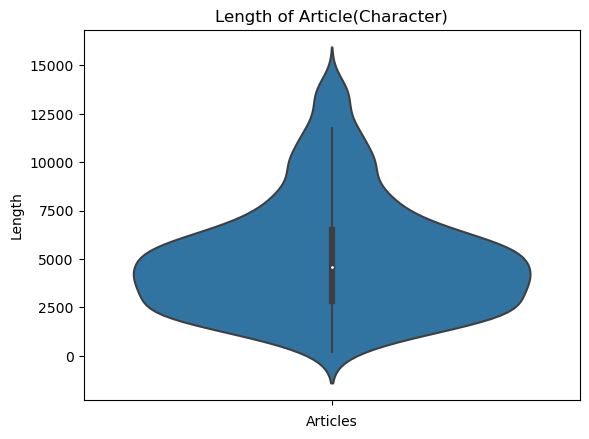

In [12]:
# Create a violin plot using Seaborn
sns.violinplot(y=filtered_df1['Body_length'])

# Set plot title and labels
plt.title('Length of Article(Character)')
plt.xlabel('Articles')
plt.ylabel('Length')

# Display the plot
plt.show()

In [13]:
# Calculate average article length
average_length = filtered_df1['Body_length'].mean()

# Print the average length
print("Average article length:", average_length)

Average article length: 5057.40387275242


In [14]:
import string
# Define a function to remove punctuation from a text
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

# Apply the remove_punctuation function to the 'Body' column
df['Body Without Punctuation'] = filtered_df1['Body'].apply(remove_punctuation)

# Print the modified DataFrame
print(df['Body Without Punctuation'])

# Remove NaN values from the 'Body Without Punctuation' column
df.dropna(subset=['Body Without Punctuation'], inplace=True)

0      Between juggling multiple dream projects and m...
1      India has the thirdlargest startup environment...
2      For the weekend we have these four amazing pap...
3      Success of a startup is never certain As a mat...
4      Any NGO registered as a private limited compan...
                             ...                        
839                                                  NaN
840                                                  NaN
841                                                  NaN
842                                                  NaN
843                                                  NaN
Name: Body Without Punctuation, Length: 844, dtype: object


In [15]:
filtered_df1 = filtered_df1[df['Body Without Punctuation'].str.len() > 0]

In [16]:
filtered_df1

,Document,Body,Title,Article Length,Body_length
0,1,Between juggling multiple dream projects and m...,1. How to start up after failure?,3804,3804
1,2,India has the third-largest start-up environme...,2. Entrepreneur Pavan Reddy Appakonda tells us...,5133,5133
2,3,"For the weekend, we have these four amazing pa...",3. From the story of a kingmaker to farmland f...,2026,2026
3,4,Success of a start-up is never certain. As a m...,4. Biggest startup failures till date you can ...,7410,7410
4,5,Any NGO registered as a private limited compan...,5. 'Startups in India bringing down unemployme...,2326,2326
...,...,...,...,...,...
754,834,Trace the growth from the early times of start...,35. Success Rate Of Indian Startups Is Higher ...,999,999
755,835,Individuals can become angel investors in two ...,36. What you need to know about becoming an an...,4692,4692
756,836,Individuals can become angel investors in two ...,37. Here's how you can become an angel investo...,4692,4692
758,839,"Launched in 2012, YourStory's Book Reviewsecti...",40. [Year in Review 2020] The Top 10 Books of ...,8069,8069


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')  
nltk.download('stopwords')

import string

# Retrieve the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    no_stopwords_text = ' '.join(filtered_tokens)
    return no_stopwords_text

# Apply the remove_stopwords function to the 'Body' column
df['Body Without Stopwords'] = df['Body Without Punctuation'].apply(remove_stopwords)

# Print the modified DataFrame
print(df['Body Without Stopwords'])

[nltk_data] Downloading package punkt to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      juggling multiple dream projects managing inve...
1      India thirdlargest startup environment world r...
2      weekend four amazing paperbacks debut authors ...
3      Success startup never certain matter fact 90 s...
4      NGO registered private limited company novel i...
                             ...                        
754    Trace growth early times startups India Govern...
755    Individuals become angel investors two ways Fi...
756    Individuals become angel investors two ways Fi...
758    Launched 2012 YourStorys Book Reviewsection fe...
763    httpswwwfactmrcomconnectussampleflagTid2524 Va...
Name: Body Without Stopwords, Length: 723, dtype: object


In [18]:
# Define a function to calculate the frequency of non-stopwords in a text
def calculate_non_stopword_frequency(text):
    tokens = word_tokenize(text)
    non_stopwords = [token for token in tokens if token.lower() not in stop_words]
    non_stopwords_count = len(non_stopwords)
    return non_stopwords_count

# Apply the calculate_non_stopword_frequency function to the 'Body' column
df['Non-Stopword Frequency'] = df['Body Without Punctuation'].apply(calculate_non_stopword_frequency)

# Print the modified DataFrame
print(df['Non-Stopword Frequency'])

0      362
1      452
2      182
3      648
4      197
      ... 
754     99
755    453
756    453
758    724
763    946
Name: Non-Stopword Frequency, Length: 723, dtype: int64


In [19]:
# Define a function to calculate the frequency of non-stopwords in a text
def calculate_non_stopword_frequency(text):
    tokens = word_tokenize(text)
    non_stopwords = [token for token in tokens if token.lower() not in stop_words]
    non_stopwords_count = len(non_stopwords)
    return non_stopwords_count

# Apply the calculate_non_stopword_frequency function to the 'Body' column
df['Non-Stopword Frequency'] = df['Body Without Punctuation'].apply(calculate_non_stopword_frequency)

# Print the modified DataFrame
print(df['Non-Stopword Frequency'])

0      362
1      452
2      182
3      648
4      197
      ... 
754     99
755    453
756    453
758    724
763    946
Name: Non-Stopword Frequency, Length: 723, dtype: int64


In [20]:
# Define a function to calculate the frequency of stopwords in a text
def calculate_stopword_frequency(text):
    tokens = word_tokenize(text)
    stopwords_count = sum(1 for token in tokens if token.lower() in stop_words)
    return stopwords_count

# Apply the calculate_stopword_frequency function to the 'Body' column
df['Stopword Frequency'] = df['Body Without Punctuation'].apply(calculate_stopword_frequency)

# Print the modified DataFrame
print(df['Stopword Frequency'])

0      204
1      371
2      141
3      632
4      191
      ... 
754     66
755    262
756    262
758    438
763    218
Name: Stopword Frequency, Length: 723, dtype: int64


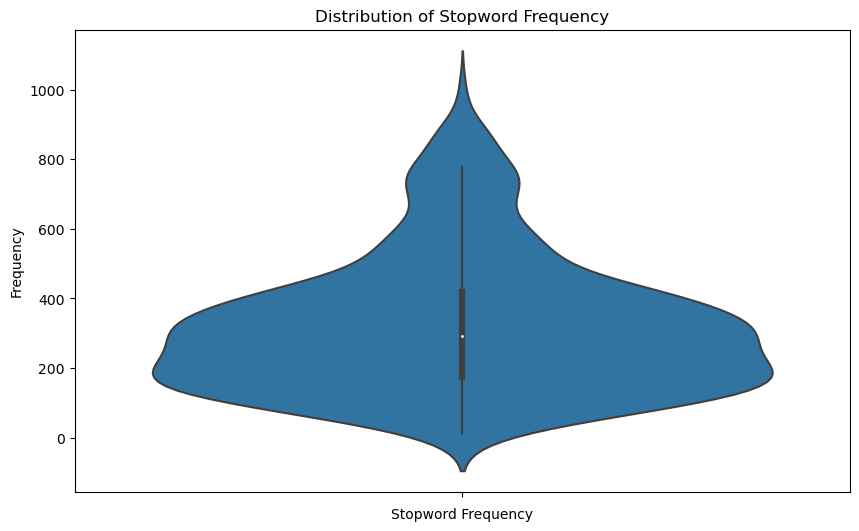

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y=df['Stopword Frequency'])
plt.xlabel('Stopword Frequency')
plt.ylabel('Frequency')
plt.title('Distribution of Stopword Frequency')
plt.show()

In [22]:
# Calculate average article length
average_frquency = df['Stopword Frequency'].mean()

# Print the average length
print("Average frequency count of stopwords::", average_frquency)

Average frequency count of stopwords:: 323.12724757952975


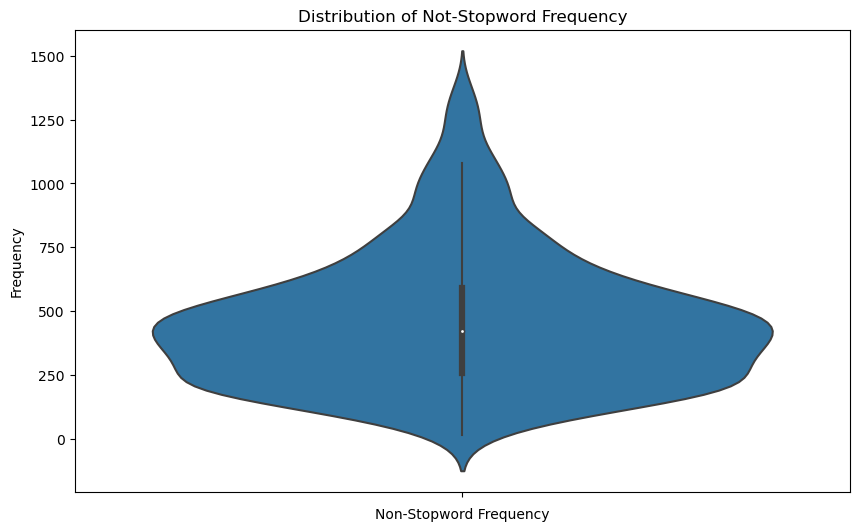

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y=df['Non-Stopword Frequency'])
plt.xlabel('Non-Stopword Frequency')
plt.ylabel('Frequency')
plt.title('Distribution of Not-Stopword Frequency')
plt.show()

In [24]:
# Calculate average article length
average_frquency = df['Non-Stopword Frequency'].mean()

# Print the average length
print("Average frequency count of Non-stopwords::", average_frquency)

Average frequency count of Non-stopwords:: 458.37759336099583


In [25]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

from nltk.corpus import stopwords

count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=5, max_df=0.7)
count_vectors = count_vectorizer.fit_transform(filtered_df1['Body'])

[nltk_data] Downloading package stopwords to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_matrix = lda_model.fit_transform(count_vectors)
H_lda_matrix = lda_model.components_

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_text = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5, max_df=0.7)
vectors_text = tfidf_text.fit_transform(filtered_df1['Body'])
vectors_text.shape

(723, 7067)

In [28]:
def display_topics(model, features, no_top_words=10):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],word_vector[largest[i]]*100.0/total))

In [29]:
display_topics(lda_model, tfidf_text.get_feature_names_out())


Topic 00
 market (1.34)
 founders (1.15)
 team (0.84)
 investors (0.80)
 company (0.79)
 companies (0.71)
 business (0.61)
 development (0.61)
 psychedelics (0.58)
 industry (0.56)

Topic 01
 said (1.66)
 india (1.25)
 start (0.96)
 heart (0.82)
 startups (0.68)
 government (0.66)
 entrepreneurship (0.61)
 innovation (0.55)
 technology (0.54)
 state (0.50)

Topic 02
 startups (1.87)
 startup (1.53)
 government (1.22)
 india (1.11)
 said (0.81)
 would (0.60)
 company (0.58)
 tax (0.47)
 employees (0.47)
 000 (0.43)

Topic 03
 startups (1.66)
 startup (1.13)
 investors (1.06)
 companies (0.69)
 capital (0.68)
 funding (0.63)
 company (0.63)
 https (0.55)
 india (0.53)
 content (0.50)

Topic 04
 startup (2.09)
 people (1.18)
 team (1.02)
 time (0.79)
 work (0.77)
 one (0.73)
 lot (0.60)
 things (0.60)
 something (0.58)
 even (0.57)

Topic 05
 start (2.99)
 ups (1.95)
 business (1.00)
 first (0.62)
 new (0.60)
 indian (0.55)
 market (0.53)
 india (0.49)
 services (0.47)
 bank (0.46)

Topi

In [30]:
import pyLDAvis.lda_model
lda_display = pyLDAvis.lda_model.prepare(lda_model, count_vectors,count_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

In [31]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer


# Initialize the summarizer
summarizer = LexRankSummarizer()

# Function to generate the summary using the specified summarizer
def summarize_text(text, summarizer):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summary = summarizer(parser.document, 1)  # You can specify the number of sentences in the summary
    return " ".join(str(sentence) for sentence in summary)

# Generate summaries for each article in the 'Body' column
df['Summary'] = filtered_df1['Body'].apply(lambda x: summarize_text(x, summarizer))

# Print the summaries
for index, row in df.iterrows():
    print(f"Article {index+1} Summary:")
    print(row['Summary'])
    print()

Article 1 Summary:
The collaborative programme aims to assist young professionals, and AlmaBetter plans to utilise Polygon's resources to produce training modules for its students to establish a foothold in the rapidly increasing Web 3.0 upskilling sector.Nearly a year after it announced the acquisition of a significant majority stake in indigenous app store Indus OS, Walmart-backed payments company PhonePe has reached an out-of-court settlement with investors in the company blocking the deal.Before you go, stay inspired with"Be educated, be organised, and be agitated."

Article 2 Summary:
Your niche will be easier to market to if you narrow it down even more.Inadequate ResearchEntrepreneurs must understand the needs of their target market.

Article 3 Summary:
For the weekend, we have these four amazing paperbacks by debut authors to suggest to our dear readers for a delightful read!Author: Shutupa Paul |Titled "Didi", as West Bengal Chief Minister Mamata Banerjee is often referred to,

In [32]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

from nltk.corpus import stopwords

count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=5, max_df=0.7)
count_vectors = count_vectorizer.fit_transform(df['Summary'])

[nltk_data] Downloading package stopwords to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_matrix = lda_model.fit_transform(count_vectors)
H_lda_matrix = lda_model.components_

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf_text = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=5, max_df=0.7)
vectors_text = tfidf_text.fit_transform(df['Summary'])
vectors_text.shape

(723, 1159)

In [36]:
def display_topics(model, features, no_top_words=10):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(min(no_top_words, len(features))):
            if largest[i] < len(features):
                print(" %s (%2.2f)" % (features[largest[i]], word_vector[largest[i]] * 100.0 / total))

In [37]:
display_topics(lda_model, tfidf_text.get_feature_names_out())


Topic 00
 start (2.05)
 people (1.64)
 investors (1.50)
 market (1.39)
 company (1.36)
 many (1.24)
 new (1.22)
 growth (1.08)
 business (1.06)
 companies (1.04)

Topic 01
 startup (2.88)
 team (1.60)
 business (1.52)
 one (1.42)
 startups (1.35)
 get (1.05)
 early (0.94)
 newstex (0.88)
 difficult (0.87)
 said (0.86)

Topic 02
 start (3.14)
 tech (2.72)
 fashion (2.29)
 ecosystem (2.18)
 ups (1.95)
 report (1.82)
 investment (1.64)
 growth (1.64)
 french (1.15)
 students (1.11)

Topic 03
 country (2.30)
 said (1.90)
 people (1.58)
 role (1.47)
 solutions (1.47)
 play (1.36)
 india (1.34)
 startups (1.34)
 come (1.30)
 minister (1.27)

Topic 04
 value (1.79)
 said (1.71)
 one (1.63)
 government (1.49)
 investment (1.28)
 investors (1.23)
 also (1.23)
 companies (1.16)
 incubators (0.88)
 brand (0.88)

Topic 05
 startups (2.66)
 said (1.33)
 capital (1.02)
 startup (1.02)
 us (0.88)
 india (0.88)
 year (0.84)
 start (0.78)
 funding (0.78)
 investors (0.78)

Topic 06
 business (1.94)
 s

In [38]:
import pyLDAvis.lda_model
lda_display = pyLDAvis.lda_model.prepare(lda_model, count_vectors,count_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

In [39]:
import nltk
nltk.download(["names","punkt","averaged_perceptron_tagger","maxent_ne_chunker","words","vader_lexicon","stopwords","shakespeare"])

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package punkt to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Unico--103\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package vader_lexicon to C:\Users\Unico--
[nltk_data]     103\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\Unico--

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(filtered_df1)):
    text = row['Body']
    myid = row['Document']
    res[myid] = sia.polarity_scores(text)

C:\Users\Unico--103\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\Unico--103\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\Unico--103\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\Unico--103\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class ha

  0%|          | 0/723 [00:00<?, ?it/s]

In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Document'})
vaders = vaders.merge(filtered_df1, how='left')

In [42]:
vaders.head()

,Document,neg,neu,pos,compound,Body,Title,Article Length,Body_length
0,1,0.030,0.888,0.082,0.9846,Between juggling multiple dream projects and m...,1. How to start up after failure?,3804.0,3804.0
1,2,0.116,0.749,0.135,0.9398,India has the third-largest start-up environme...,2. Entrepreneur Pavan Reddy Appakonda tells us...,5133.0,5133.0
2,3,0.036,0.812,0.153,0.9907,"For the weekend, we have these four amazing pa...",3. From the story of a kingmaker to farmland f...,2026.0,2026.0
3,4,0.112,0.786,0.102,-0.9441,Success of a start-up is never certain. As a m...,4. Biggest startup failures till date you can ...,7410.0,7410.0
4,5,0.063,0.827,0.110,0.8960,Any NGO registered as a private limited compan...,5. 'Startups in India bringing down unemployme...,2326.0,2326.0


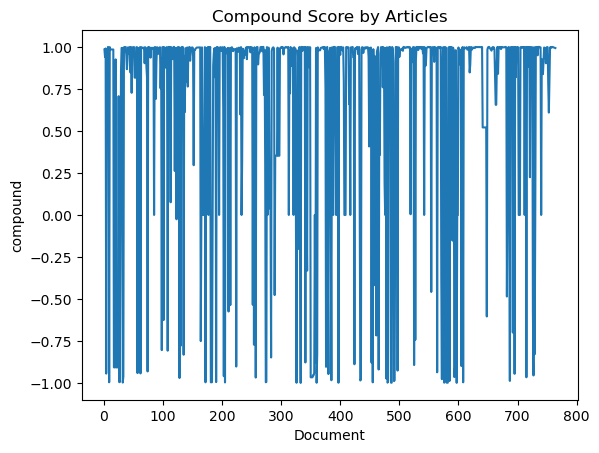

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.lineplot(data=vaders, x='Document', y='compound')
ax.set_title('Compound Score by Articles')
plt.show()

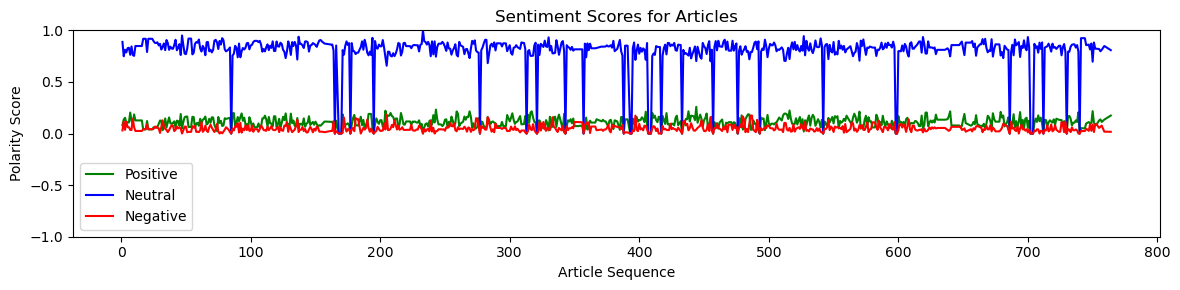

In [44]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(111)

sns.lineplot(data=vaders, x='Document', y='pos', ax=ax, color='green', label='Positive')
sns.lineplot(data=vaders, x='Document', y='neu', ax=ax, color='blue', label='Neutral')
sns.lineplot(data=vaders, x='Document', y='neg', ax=ax, color='red', label='Negative')

ax.set_ylim(-1, 1)

ax.set_title('Sentiment Scores for Articles')
ax.set_xlabel('Article Sequence')
ax.set_ylabel('Polarity Score')

plt.legend()
plt.tight_layout()
plt.show()

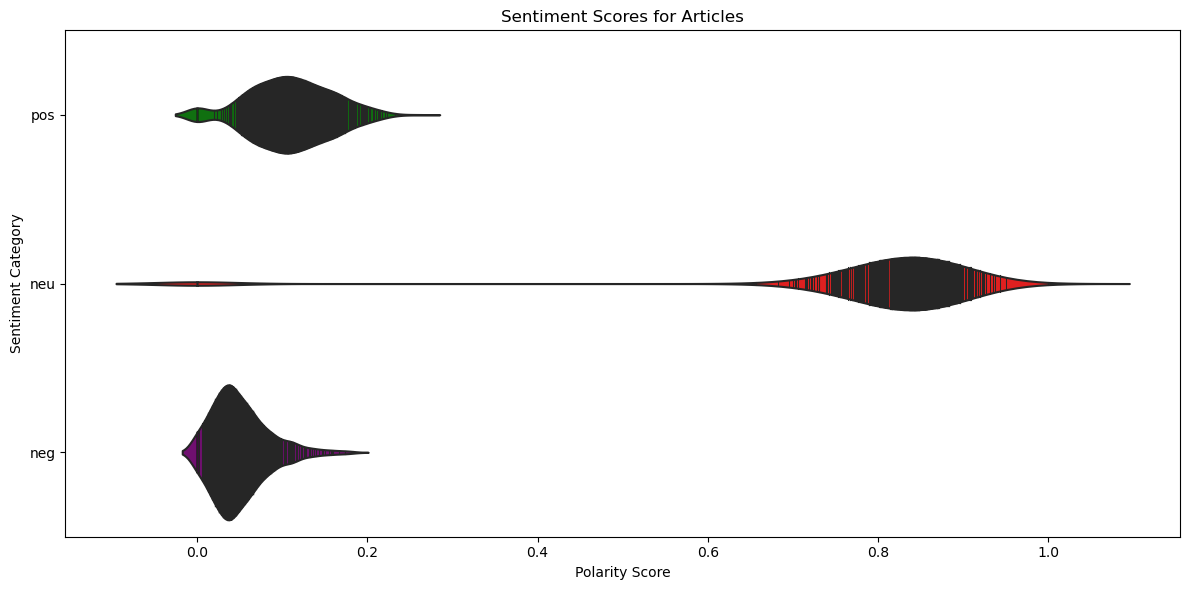

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
colors = ['green', 'red', 'purple']

sns.violinplot(data=vaders[['pos', 'neu', 'neg']], orient='h', inner="stick",palette=colors,facecolor='white')

ax.set_title('Sentiment Scores for Articles')
ax.set_xlabel('Polarity Score')
ax.set_ylabel('Sentiment Category')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df1['Title'])
n_clusters = 3  # Specify the desired number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', affinity='euclidean')
clustering.fit(X.toarray())  # Convert X to an array for compatibility
cluster_labels = clustering.labels_

C:\Users\Unico--103\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


) missing from current font.3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


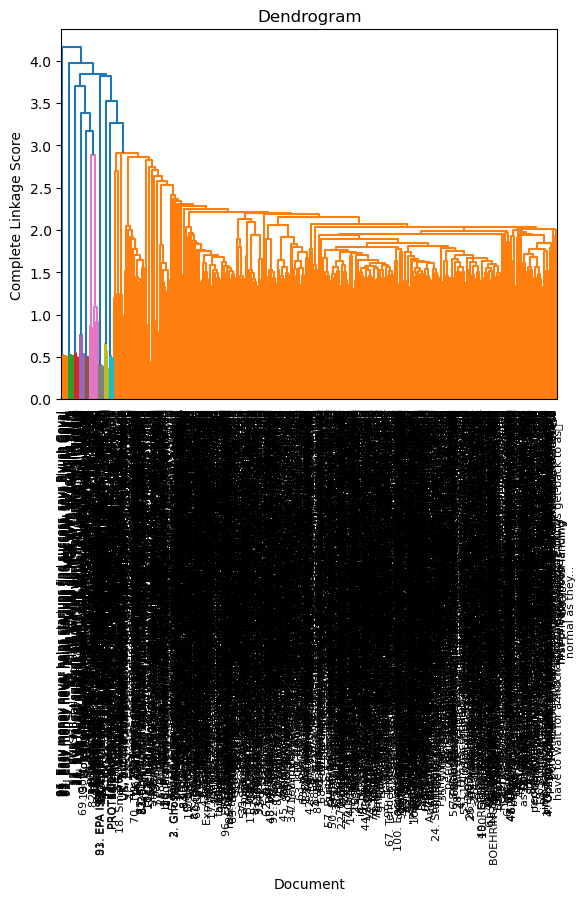

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(X.toarray(), method='ward', metric='euclidean')

dendrogram(linkage_matrix, labels=filtered_df1['Title'].values, orientation='top', leaf_font_size=8)
plt.xlabel('Document')
plt.ylabel('Complete Linkage Score')
plt.title('Dendrogram')
plt.show()

In [48]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage

distances = pairwise_distances(X.toarray(), metric='euclidean')

linkage_matrix = linkage(distances, method='complete')

complete_linkage_score = linkage_matrix[-1, 2]

C:\Users\Unico--103\AppData\Local\Temp\ipykernel_21868\4077517198.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='complete')


In [49]:
complete_linkage_score

4.451679788580429

C:\Users\Unico--103\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
) missing from current font.3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


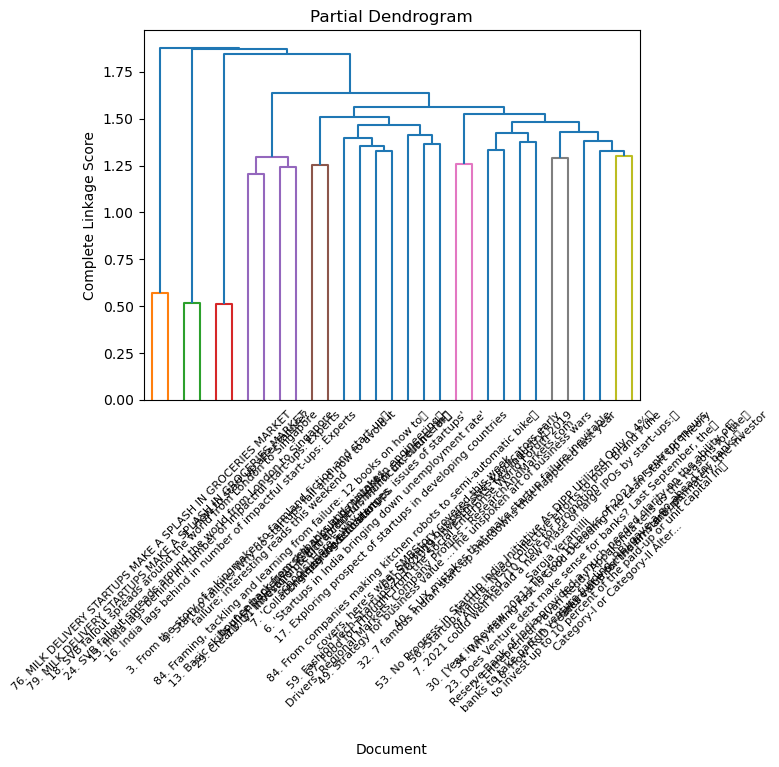

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the subset of documents you want to include in the dendrogram
subset_indices = [0, 1, 2, 5, 8, 12, 15, 17, 23, 29, 31,37,55,101,106,189,231,259,291, 301, 337, 384, 467,490,503,505,542,584,601,604,607]  # Example indices of the documents

# Subset your data based on the selected indices
subset_data = filtered_df1.iloc[subset_indices]

# Vectorize the subset of documents
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(subset_data['Title'])

# Perform clustering on the subset of documents
n_clusters = 3  # Specify the desired number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', affinity='euclidean')
clustering.fit(X.toarray())  # Convert X to an array for compatibility
cluster_labels = clustering.labels_

# Compute the linkage matrix for the subset of documents
linkage_matrix = linkage(X.toarray(), method='ward', metric='euclidean')

# Create the partial dendrogram for the subset of documents
dendrogram(linkage_matrix, labels=subset_data['Title'].values, orientation='top', leaf_font_size=8)
plt.xlabel('Document')
plt.ylabel('Complete Linkage Score')
plt.title('Partial Dendrogram')
plt.show()

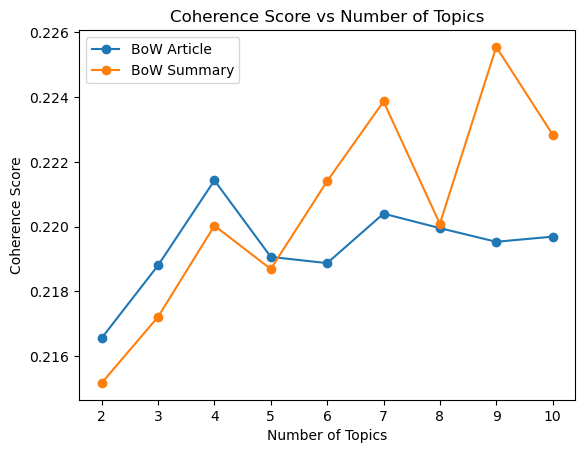

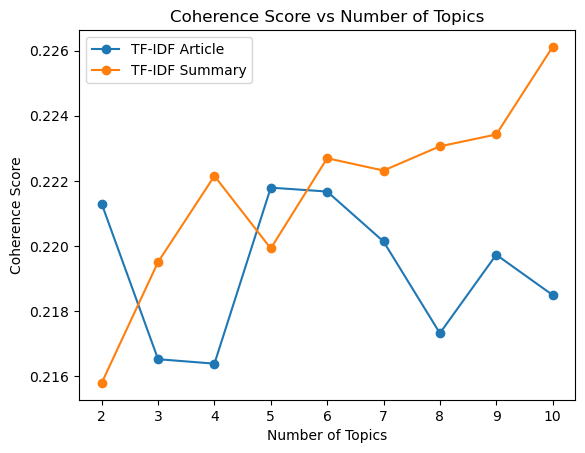

In [51]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

num_topics = 10
start_topic = 2
end_topic = 10
# Function to calculate coherence scores
def calculate_coherence_scores(corpus, num_topics, dictionary):
    coherence_scores = []
    for num_topics in range(start_topic, end_topic + 1):
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
        coherence_model = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
    return coherence_scores

# Create a list of documents from the 'Body' column
documents_body = filtered_df1['Body'].tolist()

# Create a list of documents from the 'Summary' column
documents_summary = df['Summary'].tolist()

# Combine the 'Body' and 'Summary' documents
documents = documents_body + documents_summary

# Tokenize the documents
tokenized_documents = [doc.split() for doc in documents]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_documents)

# Create the bag-of-words representation for 'Body'
bow_corpus_body = [dictionary.doc2bow(doc.split()) for doc in documents_body]

# Create the bag-of-words representation for 'Summary'
bow_corpus_summary = [dictionary.doc2bow(doc.split()) for doc in documents_summary]

# Define the range of topics to evaluate
start_topic = 2
end_topic = 10

# Calculate coherence scores for bag-of-words representation
coherence_scores_body_bow = calculate_coherence_scores(bow_corpus_body, end_topic - start_topic + 1, dictionary)
coherence_scores_summary_bow = calculate_coherence_scores(bow_corpus_summary, end_topic - start_topic + 1, dictionary)

# Plot the coherence scores for bag-of-words representation
x = np.arange(start_topic, end_topic + 1)
plt.plot(x, coherence_scores_body_bow, marker='o', label='BoW Article')
plt.plot(x, coherence_scores_summary_bow, marker='o', label='BoW Summary')

# Customize the plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()

# Create the bag-of-words representation for 'Body'
tfidf_corpus_body = [dictionary.doc2bow(doc.split()) for doc in documents_body]

# Create the bag-of-words representation for 'Summary'
tfidf_corpus_summary = [dictionary.doc2bow(doc.split()) for doc in documents_summary]

# Create the LDA model for 'Body' using TF-IDF representation
lda_model_body_tfidf = LdaModel(tfidf_corpus_body, num_topics=end_topic, id2word=dictionary)

# Create the LDA model for 'Summary' using TF-IDF representation
lda_model_summary_tfidf = LdaModel(tfidf_corpus_summary, num_topics=end_topic, id2word=dictionary)

# Calculate coherence scores for TF-IDF representation
coherence_scores_body_tfidf = calculate_coherence_scores(tfidf_corpus_body, end_topic - start_topic + 1, dictionary)
coherence_scores_summary_tfidf = calculate_coherence_scores(tfidf_corpus_summary, end_topic - start_topic + 1, dictionary)

# Plot the coherence scores for bag-of-words representation
x = np.arange(start_topic, end_topic + 1)
plt.plot(x, coherence_scores_body_tfidf, marker='o', label='TF-IDF Article')
plt.plot(x, coherence_scores_summary_tfidf, marker='o', label='TF-IDF Summary')


# Customize the plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()

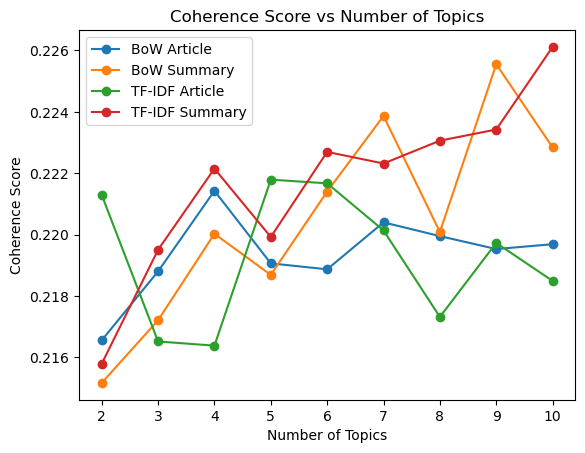

In [52]:
# Plot the coherence scores for TF-IDF representation
x = np.arange(start_topic, end_topic + 1)
plt.plot(x, coherence_scores_body_bow, marker='o', label='BoW Article')
plt.plot(x, coherence_scores_summary_bow, marker='o', label='BoW Summary')
plt.plot(x, coherence_scores_body_tfidf, marker='o', label='TF-IDF Article')
plt.plot(x, coherence_scores_summary_tfidf, marker='o', label='TF-IDF Summary')

# Customize the plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()